In [ ]:
!pip install datasets

In [ ]:
!git clone https://github.com/huggingface/lerobot.git

In [4]:
%cd lerobot

/content/lerobot


In [ ]:
!pip install --ignore-installed -e .

In [ ]:
!python lerobot/scripts/visualize_dataset.py \
    --repo-id ipa-intelligent-mobile-manipulators/studytable_open_drawer \
    --root /content/dataset \
    --episode-index 0

Device set to use cuda


dict_keys(['predicted_depth', 'depth'])


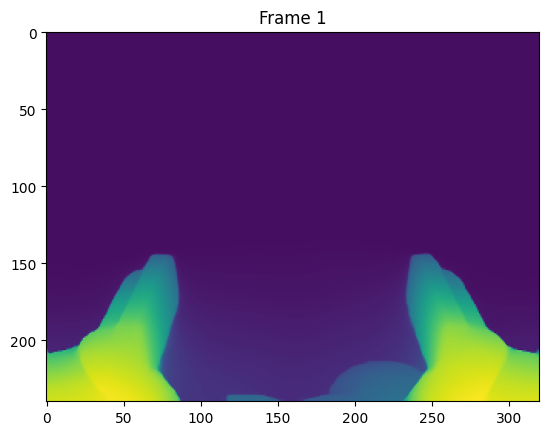

dict_keys(['predicted_depth', 'depth'])


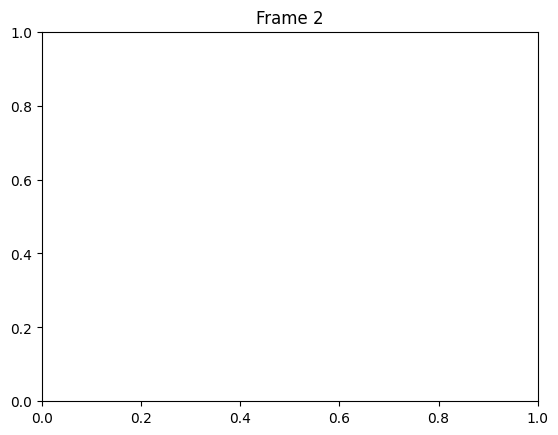

dict_keys(['predicted_depth', 'depth'])


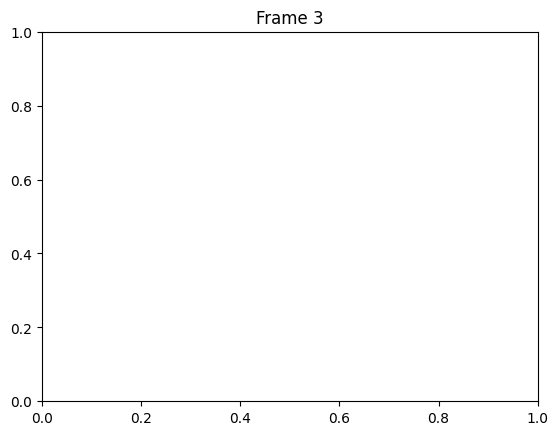

dict_keys(['predicted_depth', 'depth'])


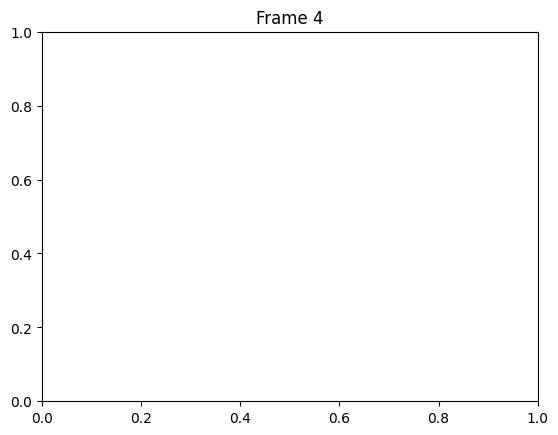

dict_keys(['predicted_depth', 'depth'])


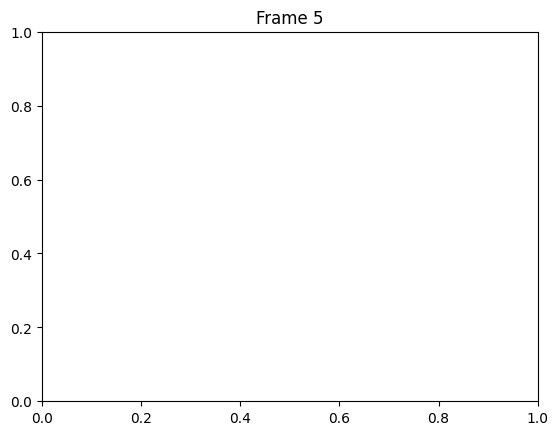

dict_keys(['predicted_depth', 'depth'])


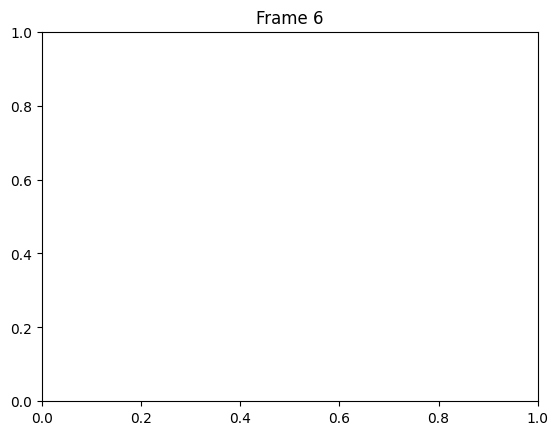

dict_keys(['predicted_depth', 'depth'])


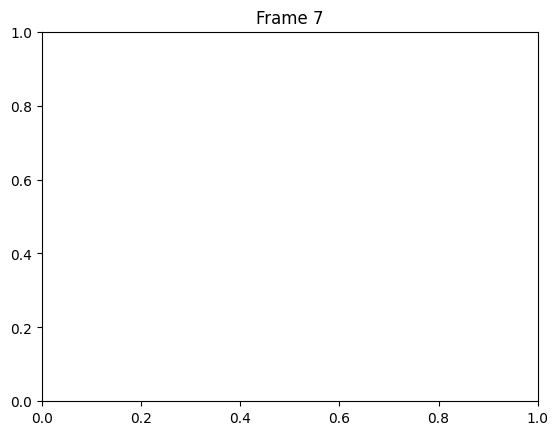

dict_keys(['predicted_depth', 'depth'])


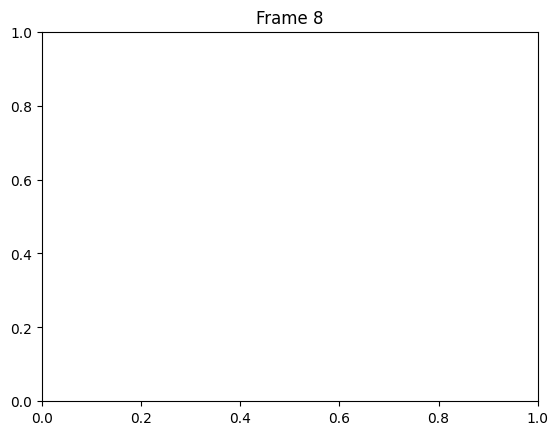

dict_keys(['predicted_depth', 'depth'])


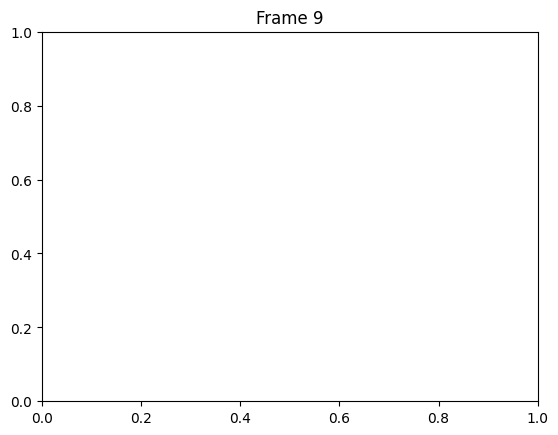

dict_keys(['predicted_depth', 'depth'])


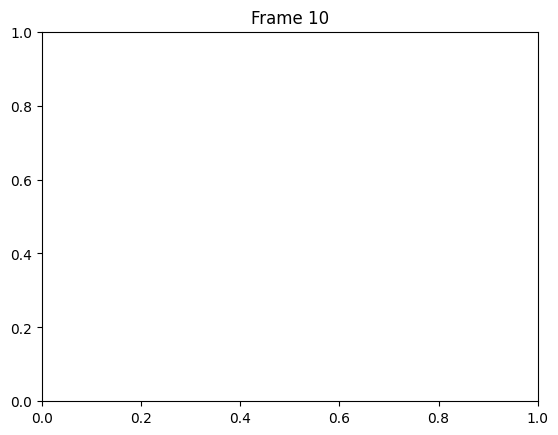

dict_keys(['predicted_depth', 'depth'])


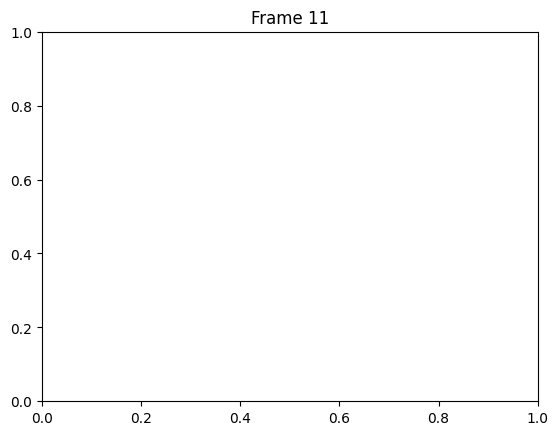

dict_keys(['predicted_depth', 'depth'])


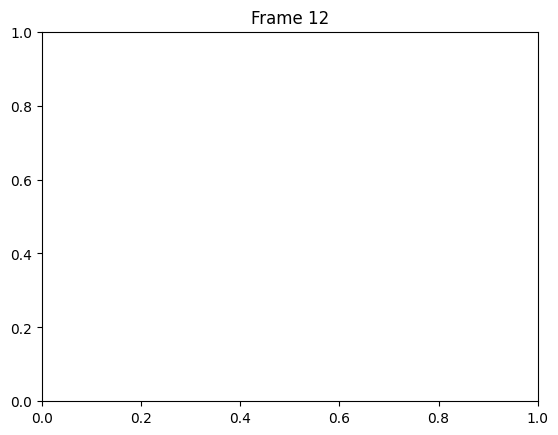

dict_keys(['predicted_depth', 'depth'])


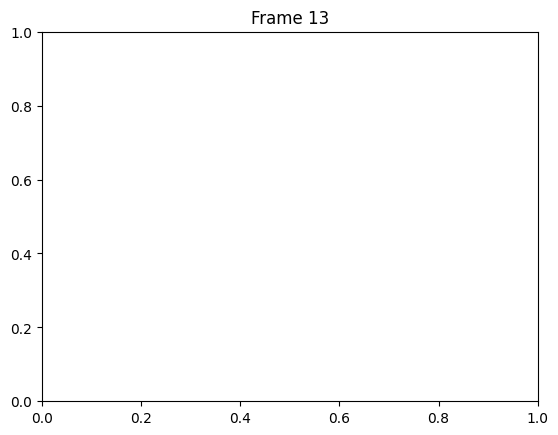

dict_keys(['predicted_depth', 'depth'])


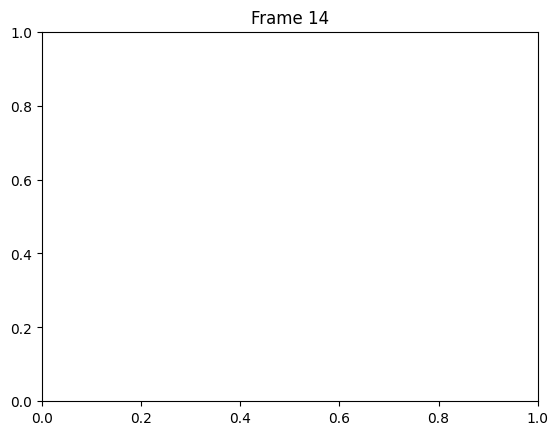

dict_keys(['predicted_depth', 'depth'])


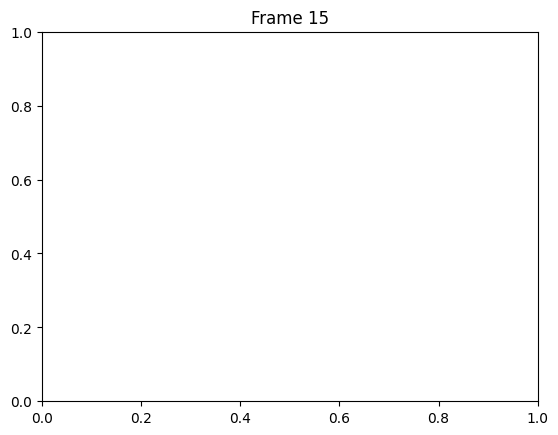

dict_keys(['predicted_depth', 'depth'])


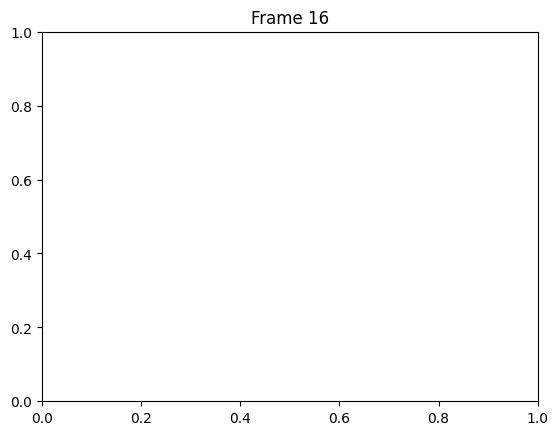

dict_keys(['predicted_depth', 'depth'])


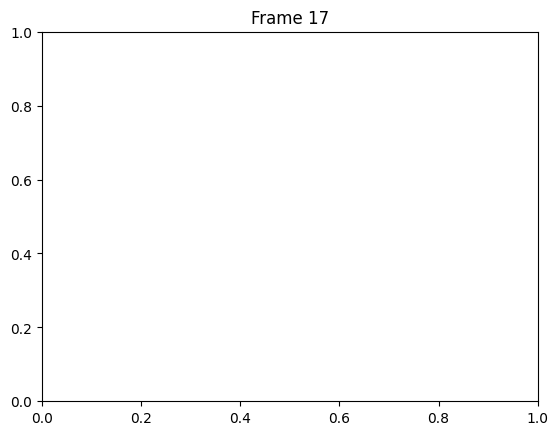

dict_keys(['predicted_depth', 'depth'])


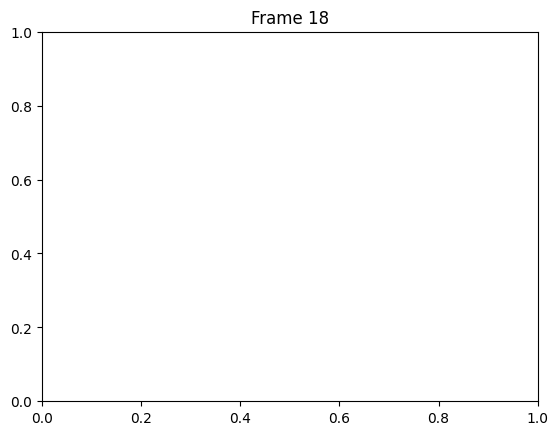

dict_keys(['predicted_depth', 'depth'])


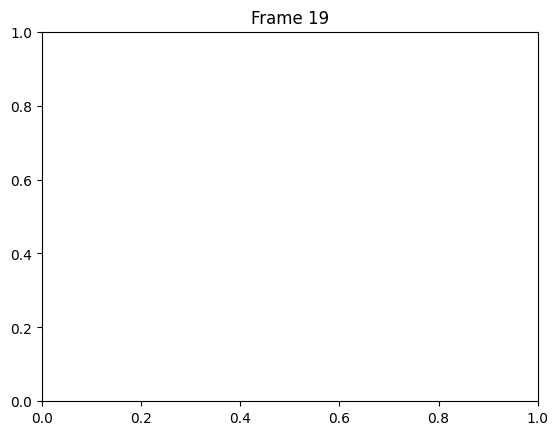

dict_keys(['predicted_depth', 'depth'])


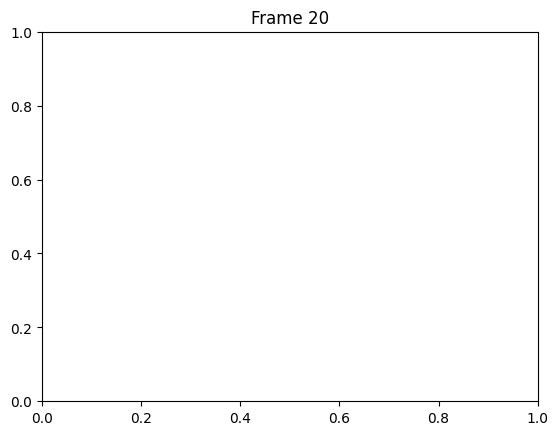

dict_keys(['predicted_depth', 'depth'])


KeyboardInterrupt: 

In [3]:
from typing import Optional
from transformers import pipeline, Pipeline
from accelerate.test_utils.testing import get_backend
from PIL import Image
import requests
import cv2
import matplotlib.pyplot as plt
import numpy as np

def open_video(path: str) -> cv2.VideoCapture:
    cap = cv2.VideoCapture(path)
    if not cap.isOpened():
        print("Error: Could not open video.")
        exit()
    return cap

def next_image_from_video(cap: cv2.VideoCapture) -> Optional[Image.Image]:
    ret, frame = cap.read()
    if not ret:
        return None

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    image = Image.fromarray(frame_rgb)
    return image

def perform_depth_example(pipe: Pipeline):
    url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/bee.jpg"
    image = Image.open(requests.get(url, stream=True).raw)
    # image.show()
    predictions = pipe(image)
    predictions["depth"].show()

def render_first_video_depth(pipe: Pipeline):
    plt.ion() # interactive so we can update the image data to "play the video"
    fig, ax = plt.subplots()

    video = open_video('/content/dataset/videos/chunk-000/observation.image.camera1_img/episode_000000.mp4')
    frame_count = 0

    frame = None
    first = True
    img_display = None
    while first or frame is not None:
        first = False
        frame_count += 1

        frame = next_image_from_video(video)

        predictions = pipe(frame)
        print(predictions.keys())
        depth = predictions['depth']

        if img_display is None:
            img_display = ax.imshow(depth) # use frame for original img
        else:
            img_display.set_data(depth) # use frame for original img

        plt.draw()
        plt.title(f'Frame {frame_count}')

        plt.pause(0.01)

    video.release()
    plt.ioff()
    plt.close()


def main():
    device, _, _ = get_backend()
    checkpoint = "depth-anything/Depth-Anything-V2-base-hf"
    pipe = pipeline("depth-estimation", model=checkpoint, device=device)

    # perform_depth_example(pipe)
    render_first_video_depth(pipe)



if __name__ == "__main__":
    main()